In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd

<BarContainer object of 5 artists>

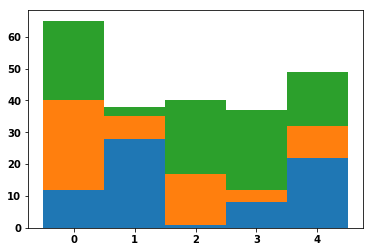

In [6]:
rc('font',weight='bold')
bars1 = [12, 28, 1, 8, 22]
bars2 = [28, 7, 16, 4, 10]
bars3 = [25, 3, 23, 25, 17]
bars = np.add(bars1, bars2).tolist()
r = [0, 1, 2, 3, 4]
names = ['a','b','c','d','e']
barWidth = 1
plt.bar(r, bars1, width = barWidth)
plt.bar(r,bars2, bottom=bars1, width=barWidth)
plt.bar(r, bars3, bottom=bars, width = barWidth)

In [70]:
import pickle
from pathlib import Path
data_folder = Path('Z:\\Maxime Chevee\Maxime 3\Analysis\Analysis OptoTagged 20180411')
file_to_open = data_folder / "master_log_lite.pkl"
with open(file_to_open, 'rb') as f:
   master_log = pickle.load(f, encoding='latin1')

In [ ]:
list(master_log)

In [72]:
len(master_log[(master_log['Stim/Block/Response'] == 'VisHit') & (master_log.unit_name == 'Cl5_05-19-17_TT1clst1')])

0

In [15]:
trial_types = list(master_log['Stim/Block/Response'].unique())
trial_types

['SomMiss', 'SomFA', 'SomCR', 'SomHit', 'VisMiss', 'VisCR', 'VisHit', 'VisFA']

In [176]:
import numpy as np
import pandas as pd
#Creat a dictionary recording trial type specific hit, miss, FA, and CR
trial_types = list(master_log['Stim/Block/Response'].unique())
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)
neuron = 'TT1clst1'
D_initial = {}

In [181]:
print(trial_types)
len(trial_types)

['SomMiss', 'SomFA', 'SomCR', 'SomHit', 'VisMiss', 'VisCR', 'VisHit', 'VisFA']


8

In [190]:
import numpy as np
import pandas as pd
#Creat a dictionary recording trial type specific hit, miss, FA, and CR
trial_types = list(master_log['Stim/Block/Response'].unique())
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)
#Fix missing sessions
neuron = 'TT1clst1'
D_initial = {}

for name in range(0, len(mouse_uni)):
    for date in range(0, len(date_uni)):
        D_initial[str(mouse_uni[name])+','+str(date_uni[date])] = [len(master_log[(master_log['Stim/Block/Response'] == trial_types[0]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[1]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[2]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[3]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[4]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[5]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[6]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)]),
                                                           len(master_log[(master_log['Stim/Block/Response'] == trial_types[7]) & (master_log.date == date_uni[date][0]) & (master_log.mouse_name == mouse_uni[name][0]) & (master_log.cluster_name == neuron)])]


In [194]:
#Create a dictionary with trial types and ratios
session = {}
for i in D_initial:
    if sum(D_initial[i][0:4]) != 0 or sum(D_initial[i][4:8]) != 0:
        session[i] = [D_initial[i][0]/sum(D_initial[i][0:4]),
                      D_initial[i][1]/sum(D_initial[i][0:4]),
                      D_initial[i][2]/sum(D_initial[i][0:4]),
                      D_initial[i][3]/sum(D_initial[i][0:4]),
                      D_initial[i][4]/sum(D_initial[i][4:8]),
                      D_initial[i][5]/sum(D_initial[i][4:8]),
                      D_initial[i][6]/sum(D_initial[i][4:8]),
                      D_initial[i][7]/sum(D_initial[i][4:8])]
#Create a list that contains the mean ratios of each trial type
means = []
for count in range(0, len(trial_types)):
    temp = []
    for i in session:
        temp.append(session[i][count])
    means.append(np.mean(temp))
sum(means[0:4])

1.0000000000000002

In [122]:
#Create a list recording the sums of all mice for each trial type
type_sum = {}
temp_list = []
for i in range(0, len(trial_types)):
    for j in D_initial:
        temp_list.append(D_initial[j][i])
    type_sum[trial_types[i]] = sum(temp_list)
type_sum

{'SomMiss': 620,
 'SomFA': 992,
 'SomCR': 2540,
 'SomHit': 3884,
 'VisMiss': 4343,
 'VisCR': 5807,
 'VisHit': 7186,
 'VisFA': 7534}

In [123]:
#Sum somatosensory and visual results
som_sum = type_sum['SomMiss']+type_sum['SomFA']+type_sum['SomCR']+type_sum['SomHit']
vis_sum = type_sum['VisMiss']+type_sum['VisCR']+type_sum['VisHit']+type_sum['VisFA']
#Create 

In [116]:
import numpy as np
len(np.unique(master_log.date))
mouse_uni = np.unique(master_log.mouse_name)
date_uni = np.unique(master_log.date)
mouse_uni[0][0]

'Cl4'

In [89]:
d={'a':[1,2],'b':2,'c':3}
d['a'][0]

1

In [102]:
l = [1,1,1,1,5,6,7,8,9]
sum(l[0:4])

4